In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/rashidesai/Downloads/Vanderbilt\ Univ\ Case\ Dataset.xlsx')

In [3]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [4]:
df.shape

(241, 19)

## Exploratory Data Analysis

In [5]:
df.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [6]:
df.corr()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
T - 28,1.000000,0.894700,0.766981,0.761258,0.764272,0.769680,0.744281,0.718607,0.697891,0.669865,0.669421,0.679711,0.685468,0.686128,0.655022,0.629432,0.608290
T - 21,0.894700,1.000000,0.871427,0.862506,0.849120,0.839669,0.821875,0.807351,0.794639,0.769279,0.771311,0.766765,0.766230,0.763745,0.742956,0.718364,0.702459
T - 14,0.766981,0.871427,1.000000,0.975593,0.940374,0.918844,0.913420,0.924774,0.919929,0.900452,0.890108,0.863536,0.846024,0.845696,0.848112,0.821478,0.800877
T - 13,0.761258,0.862506,0.975593,1.000000,0.977337,0.955026,0.941554,0.940412,0.931122,0.914450,0.911955,0.895554,0.878267,0.870565,0.862705,0.835040,0.812730
T - 12,0.764272,0.849120,0.940374,0.977337,1.000000,0.986618,0.962074,0.941533,0.922158,0.904064,0.912807,0.919413,0.910958,0.893899,0.876955,0.847387,0.818714
T - 11,0.769680,0.839669,0.918844,0.955026,0.986618,1.000000,0.979289,0.947764,0.918142,0.896470,0.906488,0.920257,0.923938,0.908863,0.885674,0.851878,0.819855
T - 10,0.744281,0.821875,0.913420,0.941554,0.962074,0.979289,1.000000,0.973322,0.935192,0.912204,0.918598,0.922247,0.927982,0.926197,0.907966,0.871200,0.842193
T - 9,0.718607,0.807351,0.924774,0.940412,0.941533,0.947764,0.973322,1.000000,0.971532,0.955061,0.945678,0.933364,0.925826,0.924528,0.922874,0.895139,0.872890
T - 8,0.697891,0.794639,0.919929,0.931122,0.922158,0.918142,0.935192,0.971532,1.000000,0.984829,0.969236,0.948335,0.930065,0.920350,0.927708,0.909233,0.887675
T - 7,0.669865,0.769279,0.900452,0.914450,0.904064,0.896470,0.912204,0.955061,0.984829,1.000000,0.984542,0.960000,0.938392,0.925503,0.934284,0.918124,0.895779


In [7]:
# Corr(T-1,Actual)=0.964 
# Corr(T-3,Actual)=0.913
# Corr(T-7,Actual)=0.896
# Corr(T-14,Actual)=0.801
# Corr(T-21,Actual)=0.702
# Corr(T-28,Actual)=0.608

# Average number of surgery cases increases  as we move closer to actual day
# As the gap from surgery day increase, the correlation decreases
# From the correlation matrix, almost all the correlations are significantly high.

In [8]:
df.groupby('DOW')['Actual'].mean(), df.groupby('DOW')['Actual'].std()

(DOW
 Fri    105.612245
 Mon    116.255319
 Thu    124.083333
 Tue    119.081633
 Wed    117.041667
 Name: Actual, dtype: float64,
 DOW
 Fri    26.357175
 Mon    18.456138
 Thu    10.379672
 Tue    10.864385
 Wed    11.240047
 Name: Actual, dtype: float64)

In [9]:
# Average of actual surgery is 116 with standard deviation of 17.63

In [10]:
# Validating for T - 1
df.groupby('DOW')['T - 1'].mean(), df.groupby('DOW')['T - 1'].std()

(DOW
 Fri     97.428571
 Mon    110.787234
 Thu    117.583333
 Tue    114.020408
 Wed    110.416667
 Name: T - 1, dtype: float64,
 DOW
 Fri    25.922159
 Mon    18.863279
 Thu    10.394011
 Tue    10.296621
 Wed    11.100764
 Name: T - 1, dtype: float64)

In [56]:
df['DOW'].value_counts()

Fri    49
Tue    49
Wed    48
Thu    48
Mon    47
Name: DOW, dtype: int64

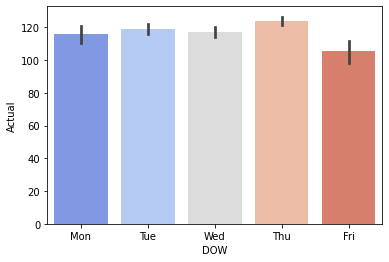

In [11]:
# Trend of Number of Surgeries performed by Day of Week
df2 = df[['DOW', 'Actual']]
ax = sns.barplot(x='DOW',y='Actual', data=df, palette='coolwarm')

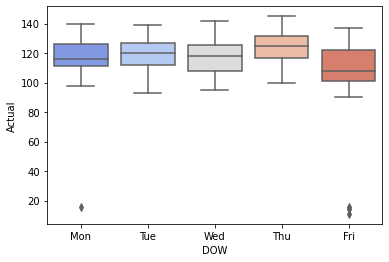

In [12]:
sns.boxplot(x='DOW',y='Actual', data=df, palette='coolwarm')

In [13]:
# Fridays have lowest number of surgeries which may be indicate surgeon preferences
# Thursdays have lowest number of surgeries
# Alternatively, the high number of surgeries on Thursday might be due to add-on cases 

In [14]:
test=df.loc[1:242, 'T - 28':'T - 1']

In [15]:
mean = test.mean()
maximum = test.max()
std = test.std()

In [16]:
a = pd.DataFrame(mean)
b = pd.DataFrame(maximum)
c = pd.DataFrame(std)
new = pd.concat([a,b,c], axis = 1)
new.columns = ['Mean', 'Maximum', 'Standard Deviation']
new

,Mean,Maximum,Standard Deviation
T - 28,34.245833,57,9.404107
T - 21,47.250000,73,11.343809
T - 14,64.458333,93,13.521033
T - 13,67.837500,99,14.227186
T - 12,70.525000,102,14.899924
T - 11,72.375000,106,15.001290
T - 10,74.954167,106,15.127699
T - 9,78.062500,112,15.082765
T - 8,82.375000,113,15.615711
T - 7,86.025000,118,16.118008


## ANOVA Testing

In [17]:
# Null Hypothesis: Total surgical case volume does not differ based on the day of week
# Alternative Hypothesis: Total surgical case volume differs based on the day of week

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Actual ~ DOW', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
DOW,8909.054042,4.0,8.002734,0.000005
Residual,65681.825626,236.0,NaN,NaN


In [19]:
# The p value obtained from ANOVA analysis is significant (p < 0.05)
# Therefore, we can conclude that there are significant differences among treatments 
# We reject the null hypothesis and accept alternative hypothesis that total surgical case volume differ by DOW

In [20]:
# Perform multiple pairwise comparison (Tukey HSD)
# Tukey test results will provide the difference between combination of any two days

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Actual'], groups=df['DOW'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Fri    Mon  10.6431  0.017   1.2796 20.0065   True
   Fri    Thu  18.4711  0.001   9.1576 27.7846   True
   Fri    Tue  13.4694  0.001    4.204 22.7348   True
   Fri    Wed  11.4294 0.0077   2.1159  20.743   True
   Mon    Thu    7.828 0.1529  -1.5831 17.2391  False
   Mon    Tue   2.8263    0.9  -6.5371 12.1898  False
   Mon    Wed   0.7863    0.9  -8.6247 10.1974  False
   Thu    Tue  -5.0017 0.5685 -14.3152  4.3118  False
   Thu    Wed  -7.0417 0.2375 -16.4031  2.3197  False
   Tue    Wed    -2.04    0.9 -11.3535  7.2736  False
-----------------------------------------------------


# Approaches:

Model 1: Linear Regression <br>
Model 2: Time Series (Simple Moving Average)

Dependent variable: Actual Surgery <br>
Independent variables: T - 28 to T - 4 <br><br>
We will not consider last 3 days for our model building: 
1. Business: Stakeholders would want to know scheduled surgery atleast a few days before actual date
2. Technical: Highest correlation with the actual surgery variable (from previous corr EDA)

## Linear Regression

Data Cleaning: Removed outliers to make the dependent variable uniformly distributed

Regression Equation:

x = a1*T-28 + a2*T-21 + ..... + ax*T-1 + ax*DOW

In [21]:
df1 = df.drop(columns = ['SurgDate', 'DOW'])

In [22]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

### Baseline model

In [23]:
# x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 
#          'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2']]
# y = df1[['Actual']]

In [51]:
x = df[['T - 3', 'T - 2', 'T - 1']]
y = df[['Actual']]

In [25]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative 

Intercept: 
 [15.00220627]
Coefficients: 
 [[-0.13743241  0.15288029  0.90361576]]


In [26]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.682e+04
Date:                Sat, 20 Feb 2021   Prob (F-statistic):                        0.00
Time:                        20:18:45   Log-Likelihood:                         -710.01
No. Observations:                 237   AIC:                                      1426.
Df Residuals:                     234   BIC:                                      1436.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 3':'T - 1']
y_pred_test_data=regressorObject.predict(predict)

In [28]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [29]:
result = pd.concat([df, Predicted], ignore_index=True, axis=1)
result.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result['Predicted'] = round(result['Predicted'])

In [30]:
final = result.dropna()
final.tail(10)

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual,Predicted
225,2012-08-23,Thu,41,48,89,98,98,98,100,110,113,117,112,112,113,114,119,129,127,122.0
226,2012-08-24,Fri,29,34,67,67,67,67,75,91,95,104,104,104,108,115,119,126,126,121.0
227,2012-08-27,Mon,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127,103.0
228,2012-08-28,Tue,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139,139,124.0
229,2012-08-29,Wed,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114,125,101.0
230,2012-08-30,Thu,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124,126,117.0
231,2012-08-31,Fri,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116,124,106.0
232,2012-09-04,Tue,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116,114,121.0
233,2012-09-05,Wed,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95,103,113.0
234,2012-09-06,Thu,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119,126,108.0


In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = final['Actual']
y_predicted = final['Predicted']
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

20.436617116072224

In [32]:
y = final['Actual']
yhat = final['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 14.719148936170212
MSE: 417.65531914893614
RMSE: 20.436617116072224
R-Squared: -0.3245360422877308


### Predicting results for 3 days before the Surgery Date

In [57]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 
         'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1']]
y = df1[['Actual']]

In [58]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative 

Intercept: 
 [14.84638197]
Coefficients: 
 [[-0.03590406  0.0856059  -0.10080439  0.07939623  0.08764874 -0.20750371
   0.03761113  0.10250478  0.00932406  0.12867575 -0.11420405 -0.03460241
   0.06443631 -0.15945052  0.12085577  0.87903786]]


In [35]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3829.
Date:                Sat, 20 Feb 2021   Prob (F-statistic):                   6.41e-255
Time:                        20:18:45   Log-Likelihood:                         -827.42
No. Observations:                 237   AIC:                                      1681.
Df Residuals:                     224   BIC:                                      1726.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 28':'T - 4']
y_pred_test_data=regressorObject.predict(predict)

In [37]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [38]:
result2 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result2.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result2['Predicted'] = round(result2['Predicted'])

In [39]:
final2 = result2.dropna()

In [40]:
round(result['Actual'].mean()), round(result2['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = final2['Actual']
y_predicted = final2['Predicted']
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

19.41955583776751

In [42]:
y = final2['Actual']
yhat = final2['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.987234042553192
MSE: 377.11914893617023
RMSE: 19.41955583776751
R-Squared: -0.19598118855684277


### Predicting results for 7 days before the surgery date

In [43]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8']]
y = df1[['Actual']]

In [44]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 28':'T - 8']
y_pred_test_data=regressorObject.predict(predict)

In [45]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [46]:
result3 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result3.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result3['Predicted'] = round(result3['Predicted'])

In [47]:
final3 = result3.dropna()

In [48]:
round(result['Actual'].mean()), round(final3['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [49]:
y = final3['Actual']
yhat = final3['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.565957446808511
MSE: 375.6085106382979
RMSE: 19.380622039508893
R-Squared: -0.19119040826349143


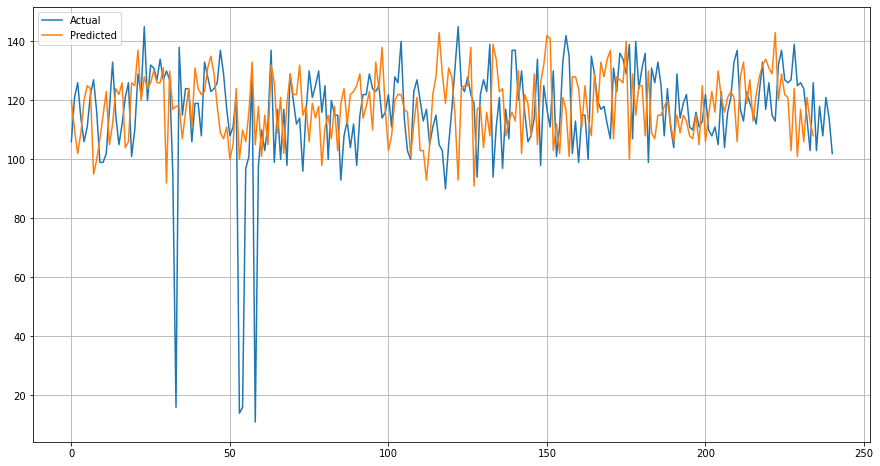

In [50]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(result['Actual'],label='Actual')
plt.plot(result['Predicted'],label='Predicted')
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)